# Betting Against Beta no Ibovespa
Escrito por: Enrique Quintslr (https://github.com/enriquemq/)

## Introdução
Neste notebook será feito o exercício de testar a famosa estratégia Betting against Beta (BaB) utilizando as ações que compõem atualmente a carteira do Ibovespa como o universo de investimento. Publicada por Andrea Frazzini e Lasse Pedersen em 2013 no *Journal of Financial Economics*, a ideia da estratégia é apostar que ações com correlação com mercado (*market beta*) relativamente mais baixa tendem a ter retornos melhores do que ações com *market beta* mais alto. Portanto, consiste em formar um portfólio long short **ex-ante market neutral** no qual a ponta long consiste de ações com betas menores e a ponta short consiste de ações com betas maiores.  

A **intuição econômica** por trás da estratégia tem como ponto de partida a existência limites à alavancagem, seja por questões de regulação ou por aversão à alavancagem. Em um mercado perfeito, os investidores escolheriam a sua alocação no *capital market line*, que representa o trade-off ótimo entre risco e retorno. Neste mercado, a forma de aumentar eficientemente o retorno esperado é através da alavancagem, se endividando no ativo livre de risco para poder aumentar a posição na carteira ótima de ativos arriscados.  
No entanto, o mercado do mundo real existem restrições à alavancagem e, assim, a forma que os investidores com maior apetite ao risco tem para aumentar seu retorno esperado é aumentando a exposição à ativos com beta elevado. Desta forma, ativos que possuem beta elevado tem uma utilidade adicional em relação aos que possuem beta mais baixo, uma vez que permitem alcançar pontos mais altos na market capital line. Logo, em um mercado em equilíbrio, ativos com beta alto devem ter embutido em seus preços um "prêmio de alavancagem" e, por esse motivo, apresentariam retorno esperado ajustado para risco de mercado menor que ativos com beta menor.  

O restante do notebook está organizado da seguinte forma: primeiro serão dados maiores detalhes sobre a metodologia, em seguida será apresentado o resultado e em seguida, apresentado o código utilizado para obter os resultados. Por fim, uma breve lista de bibliografia é apresentada, onde encontra-se a referência para o paper original e alguns estudos feitos para o caso brasileiro.

## Metodologia

**Dados:**  
Os dados de preços das ações foram extraídos da base do Yahoo Finance, enquanto as séries dos retornos dos fatores de risco obtidos do site do NEFIN.

**Formação do Portfólio:**  
Passo 1 - Cálculo dos betas:  
-  No primeiro dia de cada mês (que tenha dados disponíveis suficientes) para cada ação é realizada a regressão do modelo de 5 fatores usando a janela dos 252 dias anteriores. Destas regressões são extraídos o market beta de cada ação.

Passo 2 - Cálculo dos pesos:  
- Obtido os betas, calcula-se a mediana dos betas de cada mês. As ações que tiverem $\beta$ menor que a mediana são alocadas no portfólio long e as ações com $\beta$ maior que a mediana são alocadas no portfólio short.
- Dentro de cada portfólio direcional, os pesos das ações são decididos ponderando pelos betas. Ou seja, considerando a ação $i$ que está alocada no portfólio $p$, seu peso $w_i$ é calculado da seguinte forma:
$$w_i = \frac{\beta_i}{\sum_{j\in p}\beta_j}$$  

- Por fim, como o objetivo é ter um portfólio long short market neutral ($\beta_{BaB} = 0$) será necessário alavancar a ponta long e desalavancar a ponta short, de forma que ambas as pontas tenham $\beta$ igual a $1$. Para tal, é necessário calcular o $\beta$ de cada ponta e, assim, a "intensidade" da alavancagem (desalavancagem no caso da ponta short) será dada por $\frac{1}{\beta_{ponta}}$.

Observações: Como para gerar o portfólio $\beta$ neutral é necessário alavancagem, diferente da maioria dos portfólios teóricos, o **BaB não é Dollar Neutral** (no nosso caso, Real Neutral).

**Cálculo de retornos e análise dos resultados:**  
Com os pesos calculados, o retorno mensal da estratégia é dado por:
$$r_{BaB} = \frac{1}{\beta_{long}}(r_{long} - r_f) - \frac{1}{\beta_{short}}(r_{short} - r_f)$$  
Onde $r_{BaB}$ é o retorno da estratégia, $r_{long}$ ($r_{short}$) é o retorno da ponta long (short) antes dos ajustes dos betas e $r_f$ é a taxa livre de risco.  

Com o resultado em mãos, será comparado o retorno da estratégia, o retorno da ponta long e o retorno da ponta short com o retorno do Ibovespa utilizando as métricas de performance usuais. Posteriormente, calculando o retorno diário do $BaB$ e de suas pontas, serão feitas regressões de 5 fatores poder analisar suas relações com os principais fatores de risco.

## Resultados e Análise
Para melhorar a organização do notebook, os resultados e a análise são apresentadas antes dos códigos. Portanto, para replicar o resultado apresentado abaixo é necessário **rodar primeiro a sessão que contém os códigos**.

### Resultados

Regressões utilizando dados de retorno diário 
              BaB     Small_Beta Large_Beta
-------------------------------------------
Intercept  -0.0004    0.0002     0.0008*** 
           (0.0003)   (0.0002)   (0.0003)  
mkt_factor -0.0285    0.8187***  1.7740*** 
           (0.0178)   (0.0113)   (0.0208)  
smb_factor -0.3271*** 0.0995**   0.5441*** 
           (0.0687)   (0.0437)   (0.0802)  
hml_factor 0.0177     -0.1365*** -0.0439   
           (0.0368)   (0.0234)   (0.0430)  
wml_factor 0.0186     0.0500**   0.0380    
           (0.0347)   (0.0221)   (0.0406)  
iml_factor 0.2856***  0.0907*    -0.2237***
           (0.0740)   (0.0471)   (0.0864)  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01 

Métricas de Performance:


,Annualized Accumulated Return,Annualized Mean Return,Annualized Std,Sharpe Ratio,Max Drawdown
BaB,-0.041714,-0.035614,0.116910,-0.876941,0.197413
Small Beta,0.135779,0.164919,0.226835,0.384915,0.357969
Large Beta,0.281306,0.462401,0.500002,0.639694,0.608595
Ibovespa,0.109171,0.139049,0.248689,0.259715,0.397274


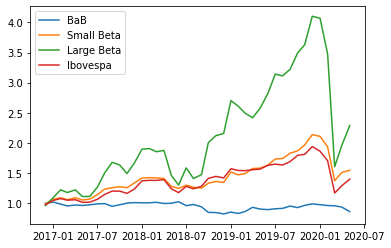

In [13]:
print('Regressões utilizando dados de retorno diário',
      summary_col(models,
                  stars=True,
                  model_names=['BaB', 'Small_Beta', 'Large_Beta']),
       '\n')
print('Métricas de Performance:')
comparar_performances()

### Análise
Primeiro analisando as métricas de performance, temos que a estratégia $BaB$ apresentou retorno negativo no período analisado. Assim temos um indício de que não seria possível extrair o "prêmio de alavancagem" usando apenas as ações que compõem o Ibov. No entanto, é necessário levar em conta que este período é relativamente curto para avaliar esse tipo de estratégia, uma vez que estratégias voltadas para prêmios de risco tem como objetivo ganhos no longo prazo. Assim, seria necessário avaliar a estratégia em uma janela de tempo mais longa. Para outros estudos para o caso brasileiro ver Esposito (2017), Nascimento (2017) e Lima (2019).

Por outro lado os dois portfólios direcionais formados para a estratégia apresentaram performance bem satisfatórias, superando o benchmark. O portfólio de ações $Small\text{ }Beta$ ($SB$) domina o Ibov tanto em retorno anualizado quanto em volatilidade, portanto, apresentou um sharpe ratio mais atrativo. Além disso, o max drawdown também foi menor que do Ibovespa. Já o portfólio $Large\text{ }Beta$ ($LB$), apesar de apresentar volatilidade e drawdown máximo maior que o do Ibovespa (o que era esperado por ser composto de ações com betas elevados), apresenta sharpe ratio maior que do Ibov e do que o $SB$, uma vez que o retorno obtido mais do que compensou o aumento do risco.  

Agora avaliando os resultado da regressão do $BaB$, primeiro notar que o objetivo de construir um portfólio market neutral foi cumprido: o coeficiente relacionado ao fator de mercado na regressão **não** é estatisticamente diferente de $0$. Apesar disso, observa-se que o portfólio tem exposição não trivial ao fator de risco de tamanho $SMB$ e ao fator de risco de iliquidez $IML$. No caso do $SMB$ temos que o coeficiente é negativo, mostrando que o portfólio está sobrepesando ações de empresas maiores. Já no caso do $IML$, como o coeficiente é positivo, o portfólio concentra ações com maior iliquidez.

Comparando os resultados das regressões entre os dois portfólios direcionais, observa-se que a diferença entre o market $\beta$ deste portfólios é razoavelmente grande. O coeficiente do portfólio $LB$ é maior que o dobro do coeficiente do $SB$. Além disso, $LB$ tem uma exposição consideravelmente maior do que o $SB$ ao fator de risco de tamanho. Uma explicação possível é o fato de ações de empresas menores terem maior risco e, portanto, maior $\beta$. Outro resultado interessante, é o fato do $SB$ ter coeficiente relacionado ao portfólio de iliquidez positivo enquanto o $LB$ apresenta coeficiente negativo. Este é um resultado razoável considerando que ações com menor liquidez tem, também, menor correlação com o mercado.  

Finalmente, o resultado que mais chama atenção é o fato do portfólio **$LB$ ter apresentado $\alpha$ estatisticamente maior que $0$**. Portanto, além de não termos observado retornos positivos no $BaB$ ainda temos que existiu retorno anormal em investir sistematicamente em ações com $\beta$ mais elevado. Tal resultado pode ter as seguintes possíveis interpretações: (1) a janela temporal estudada consiste em um período de baixa aversão (ou baixa restrição) à alavancagem e/ou (2) no período analisado a aversão ao risco dos investidores era consideravelmente alta, fazendo-os sobrepesar ações com betas mais baixos.

## Código:

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

### Montando as bases que serão utilizadas nas regressões

Montando base dos fatores de risco


In [2]:
url_smb_factor = 'http://nefin.com.br/Risk%20Factors/SMB_Factor.xls'            
url_hml_factor = 'http://nefin.com.br/Risk%20Factors/HML_Factor.xls'            
url_wml_factor = 'http://nefin.com.br/Risk%20Factors/WML_Factor.xls'            
url_iml_factor = 'http://nefin.com.br/Risk%20Factors/IML_Factor.xls' 
url_rate_curve = 'http://nefin.com.br/Spot%20Rate%20Curve/spot_rate_curve.xls'  

# Criando dicionários para usar no loop a seguir
series = {'smb_factor': url_smb_factor,
          'hml_factor': url_hml_factor,
          'wml_factor': url_wml_factor,
          'iml_factor': url_iml_factor,
         }
dfs = {}

# Loop para pegar os dados, formatar datas e definir data como índice
for k,v in series.items():
  dfs[k] = pd.read_excel(v)
  if 'day' in dfs[k].columns:  # necessário porque rate_curve já vem cum uma única coluda para as datas
    dfs[k]['Date'] = pd.to_datetime(dfs[k][['year', 'month', 'day']])
    dfs[k] = dfs[k].drop(columns=['year', 'month', 'day'])
  dfs[k] = dfs[k].set_index('Date')
  dfs[k] = dfs[k].iloc[:,0] # para transformar em pd.Series e conseguir usar pd.DataFrame.from_dict()
# Juntando
base_risk_factor = pd.DataFrame.from_dict(dfs)

# Montando mkt_minus_rf manualmente
base_risk_free = pd.read_excel(url_rate_curve)
base_risk_free = base_risk_free[['Date', '1 month']]
base_risk_free = base_risk_free.set_index('Date')
base_risk_free.index.name = 'Date'
base_risk_free = (1+base_risk_free)**(1/252) - 1
base_risk_free.columns = ['risk_free']
 
bvsp = web.DataReader('^BVSP', data_source='yahoo')
bvsp_retornos = bvsp[['Close']]
bvsp_retornos = (bvsp_retornos - bvsp_retornos.shift()) / bvsp_retornos.shift()
bvsp_retornos.index.name = 'Date'
bvsp_retornos = bvsp_retornos.merge(base_risk_free, how = 'inner', on = 'Date')
bvsp_retornos['Rm_minus_Rf'] = bvsp_retornos.iloc[:,0] - bvsp_retornos.iloc[:,1]
base_risk_factor['mkt_factor'] = bvsp_retornos[['Rm_minus_Rf']]
base_risk_factor.dropna(inplace=True)

Montando base das ações

In [3]:
tickers = ['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC4.SA',
           'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA', 'BRDT3.SA', 
           'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BTOW3.SA', 'CCRO3.SA', 
           'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA', 'CPFE3.SA', 'CRFB3.SA',
           'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA',
           'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 
           'ENGI11.SA', 'EQTL3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GNDI3.SA',
           'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HGTX3.SA', 'HYPE3.SA',
           'IGTA3.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 
           'KLBN11.SA', 'LAME4.SA', 'LREN3.SA', 'MGLU3.SA', 'MRFG3.SA',
           'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PETR3.SA', 'PETR4.SA',
           'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SANB11.SA', 
           'SBSP3.SA', 'SULA11.SA', 'SUZB3.SA', 'TAEE11.SA', 'TIMP3.SA',
           'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT4.SA', 
           'VVAR3.SA', 'WEGE3.SA', 'YDUQ3.SA']

# Baixando os dados do Yahoo
keys = []
for ticker in tickers:
    name = ticker[:-3]
    keys.append(name)

dfs = {}
for i in range(len(keys)):
  dfs[keys[i]] = web.DataReader(tickers[i], data_source='yahoo') 

# Consolidando os preços de fechamento em uma única base
base_fechamentos = []
for key in dfs.keys():
  base_fechamentos.append(dfs[key]['Close'])
base_fechamentos = pd.DataFrame(base_fechamentos).transpose()
base_fechamentos.columns = dfs.keys()
base_retorno = base_fechamentos.diff() / base_fechamentos.shift()

Juntando as duas bases

In [4]:
base_completa = base_retorno.merge(base_risk_factor, on = 'Date')
base_completa['risk_free'] = base_risk_free['risk_free']

### Calculando os betas

In [5]:
# datas_aux pega o primeiro dia de cada mês no indice de base_completa
datas_aux = pd.DataFrame(base_completa.index, index = base_completa.index).resample('MS').agg('first')
# base_betas usa os dados da data_aux como índice para poder rodar o Loop a seguir
base_betas = pd.DataFrame(index = datas_aux['Date'])
# base_completa_mensal para calcular o retorno dos portfolios (note que tem o mesmo index 'irregular' de base_betas)
base_completa_mensal = base_completa.resample('MS').agg(lambda x: (x+1).prod() -1)
base_completa_mensal.index = datas_aux['Date']


In [6]:
# No primeiro dia do mês t, rodar a regressao com 252 obs até o último dia do mês t-1. Com isso, calcular os pesos para o portfólio do mês t.
for col in base_retorno.columns:
    betas = []
    for date in base_betas.index: 
        base_reg_aux = base_completa.loc[:,[col, 'risk_free', 'mkt_factor', 'smb_factor', 'hml_factor', 'wml_factor', 'iml_factor']]
        base_reg_aux['Y'] = base_reg_aux.loc[:,col] - base_reg_aux['risk_free']
        base_reg_aux.dropna(inplace = True)
        
        if date not in base_reg_aux.index:
            betas.append(None)
        else:  
            n = np.where(base_reg_aux.index==date)[0][0]
            if n >= 252:
                base_reg_aux['Y'] = base_reg_aux.loc[:,col] - base_reg_aux['risk_free']
                model = ols("Y ~ mkt_factor + smb_factor + hml_factor + wml_factor + iml_factor", base_reg_aux.iloc[n-252:n]).fit()
                beta = model.params[1]*0.7 + 1*0.3 # 1 = cross sectional beta! VASICEK (1973) APPROACH COM PESO 0.4 (mitigate outliers influence) 
                betas.append(beta)
            else:
                betas.append(None)
    base_betas[col] = betas

# Tirando as datas com mais da metade de NaNs
base_betas.dropna(axis = 0, thresh=len(base_betas.columns)/2, inplace=True)


### Formação das carteiras

In [7]:
# Subtrair a mediana para auxiliar na formação das carteiras
base_betas_mediana = base_betas.sub(base_betas.median(axis = 1), axis = 0)

# Ativos em cada uma das carteiras em cada mês. Se beta - mediana_beta > 0 toma-se posição SHORT no ativo. Se beta - mediana_beta < 0, toma-se posição LONG.
carteira_long_ativos = pd.Series(dtype='object')
carteira_short_ativos = pd.Series(dtype='object')
for date in base_betas_mediana.index:
  carteira_long_ativos[date] = [col for col in base_betas_mediana.columns if base_betas_mediana.loc[date, col] < 0]
  carteira_short_ativos[date] = [col for col in base_betas_mediana.columns if base_betas_mediana.loc[date, col] >= 0]

# Cacular os pesos nao ajustados
base_pesos_long_semajuste = pd.DataFrame(index=base_betas.index)
base_pesos_short_semajuste = pd.DataFrame(index=base_betas.index)

for date in base_betas.index:
    for a in base_betas.columns:
        if a in carteira_long_ativos[date]:
            base_pesos_long_semajuste.loc[date, a] = base_betas.loc[date, a]/base_betas.loc[date,carteira_long_ativos[date]].sum()
            base_pesos_short_semajuste.loc[date, a] = 0
        elif a in carteira_short_ativos[date]:
            base_pesos_long_semajuste.loc[date, a] = 0
            base_pesos_short_semajuste.loc[date, a] = base_betas.loc[date, a]/base_betas.loc[date,carteira_long_ativos[date]].sum()
        else:
            base_pesos_long_semajuste.loc[date, a] = 0
            base_pesos_short_semajuste.loc[date, a] = 0

### Calculando os retornos

In [8]:
# Retornos de cada ponta:
INICIO = np.where(base_completa_mensal.index==base_pesos_short_semajuste.index[0])[0][0]
retorno_long_sem_ajuste = pd.Series((base_completa_mensal.iloc[INICIO:,:-6].values * base_pesos_long_semajuste.values).sum(axis=1),
                                    index=base_pesos_long_semajuste.index)
retorno_short_sem_ajuste = pd.Series((base_completa_mensal.iloc[INICIO:,:-6].values * base_pesos_short_semajuste.values).sum(axis=1), 
                                     index=base_pesos_long_semajuste.index)

# Calculando os betas de cada portfólio direcional
base_betas_aux = base_betas.values
base_betas_aux[pd.isnull(base_betas.values)] = 0

betas_long_leg = pd.Series((base_pesos_long_semajuste.values * base_betas_aux).sum(axis=1), index=base_pesos_long_semajuste.index)
betas_short_leg = pd.Series((base_pesos_short_semajuste.values * base_betas_aux).sum(axis=1), index=base_pesos_long_semajuste.index)

# Retorno BaB:
rf = base_completa_mensal.iloc[INICIO:, :]['risk_free']
retorno_bab = ((1/betas_long_leg)*(retorno_long_sem_ajuste - rf)
              -(1/betas_short_leg)*(retorno_short_sem_ajuste - rf))

In [9]:
# Comparando os Portfólios:
mkt_minus_rf = base_completa_mensal.iloc[INICIO:, :]['mkt_factor']
portfolios_retornos_mensais = {'BaB': retorno_bab,
                               'Small Beta':retorno_long_sem_ajuste,
                               'Large Beta':retorno_short_sem_ajuste,
                               'Ibovespa': (mkt_minus_rf + rf)}

def month_to_acum(serie):
  return (1+serie).cumprod()

def max_drawdown(series):
  series = list(series)
  drawdown = 0
  for i in range(len(series)):
    for j in range(i):
      d = (series[i] - series[j])/series[j]
      if d < drawdown:
        drawdown = d
  return abs(drawdown)
                  

### Comparando as performances

In [10]:
def comparar_performances():
    metrics_lists = []
    for k in portfolios_retornos_mensais.keys():
        port = portfolios_retornos_mensais[k]
        acum = month_to_acum(port)
        sharpe =  (np.mean(port)-np.mean(rf))/np.std(port)*np.sqrt(12)
        annualized_acum_return = (1 + (acum[-1]-acum[0])/acum[0])**(12/len(acum)) - 1
        annualized_mean_return = (1+np.mean(port))**(12) - 1
        annualized_std = np.std(port)*np.sqrt(12)
        max_d = max_drawdown(acum)
        metrics_lists.append([annualized_acum_return,
                              annualized_mean_return,
                              annualized_std,
                              sharpe,
                              max_d])
        plt.plot(acum, label = k)
    metricas_consolidadas = pd.DataFrame(metrics_lists, 
                                         index = portfolios_retornos_mensais.keys(),
                                         columns=['Annualized Accumulated Return',
                                                  'Annualized Mean Return', 
                                                  'Annualized Std',
                                                  'Sharpe Ratio',
                                                  'Max Drawdown'] )

    plt.legend()
    display(metricas_consolidadas)

### Regressão 5 fatores usando os retornos diários

Preparando as bases

In [11]:
# Passando bases mensais para bases diárias
base_pesos_long_semajuste_d = base_pesos_long_semajuste.resample('D').agg('ffill')
base_pesos_short_semajuste_d = base_pesos_short_semajuste.resample('D').agg('ffill')
betas_long_leg_d = betas_long_leg.resample('D').agg('ffill')
betas_short_leg_d = betas_short_leg.resample('D').agg('ffill')

# Padronizando o index
base_merge_aux = base_pesos_long_semajuste_d.merge(base_retorno, on='Date') # Usar o indice dessa base para filtrar as bases de pesos diários
base_pesos_long_semajuste_d = base_pesos_long_semajuste_d.loc[base_merge_aux.index]
base_pesos_short_semajuste_d = base_pesos_short_semajuste_d.loc[base_merge_aux.index]
betas_long_leg_d = betas_long_leg_d.loc[base_merge_aux.index]
betas_short_leg_d  = betas_short_leg_d.loc[base_merge_aux.index]

# Calculando os retornos dos portfólios direcionais
INICIO_d = np.where(base_retorno.index==base_pesos_short_semajuste_d.index[0])[0][0]
FIM_d = np.where(base_retorno.index==base_pesos_short_semajuste_d.index[-1])[0][0]
base_retorno_aux = base_retorno.iloc[INICIO_d:FIM_d+1,:]
base_retorno[pd.isnull(base_retorno_aux)] = 0
retornos_long_d = pd.Series((base_pesos_long_semajuste_d.values * base_retorno_aux.values).sum(axis=1), 
                            index = base_merge_aux.index)
retornos_short_d = pd.Series((base_pesos_short_semajuste_d.values * base_retorno_aux.values).sum(axis=1), 
                             index = base_merge_aux.index)

# Calculando retorno BAB
base_calc_d = pd.concat([retornos_long_d, retornos_short_d, base_completa['risk_free']], axis = 1)
base_calc_d.columns = ['ret_long', 'ret_short', 'risk_free']
base_calc_d.dropna(inplace=True)
retorno_bab_d = ( (1/betas_long_leg_d)*(base_calc_d['ret_long'] - base_calc_d['risk_free']) 
                 -((1/betas_short_leg_d)*(base_calc_d['ret_short'] -base_calc_d['risk_free'])))

# Preparando base para regressão
base_port_d = pd.DataFrame(np.array([retorno_bab_d, retornos_long_d, retornos_short_d]).T, 
                           index = retorno_bab_d.index,
                           columns = ['retorno_bab_d', 'retornos_long_d', 'retornos_short_d']).astype('float64')                        
base_reg_d = base_completa.iloc[:,-6:].merge(base_port_d, on = 'Date')

Rodando as regressões

In [12]:
from statsmodels.iolib.summary2 import summary_col
models = []
for col in base_port_d.columns:
  base_reg_d['Y'] = base_reg_d[col] - base_reg_d['risk_free']
  model = ols("Y ~ mkt_factor + smb_factor + hml_factor + wml_factor + iml_factor", data = base_reg_d).fit()
  models.append(model)

## Bibliografia



ESPOSITO, V. Betting Against Beta in Brazil. GV Invest Short Studies Series, 2017.  

**FRAZZINI, A. e LASSE, P. Betting Against Beta, Journal of
Financial Economics 111 (1), 1–25, 2014.**

LIMA, I. de Castro. A estratégia Betting Against Beta no mercado de ações brasileiro. Dissertação (Mestrado) - PUC-RJ, Departamento de Economia, 2019.  

NASCIMENTO, F. Betting against beta no mercado acionário brasileiro. Dissertação (MPFE) - FGV, Escola de Economia de São Paulo, 2017.